# Principal Component Analysis

In this exercise sheet we look into how to compute and apply a Principal Component Analysis (PCA).

## Toy 4D Example

We start by loading our toy example. The data is stored as a Numpy array, it is a $2585\times 5$ matrix. The last component of each row is the label, the first four components are the coordinates in 4D. Each label is an integer from  $\{0, 1, 2, 3, 4\}$.

The data contains a noisy 2D plane which is embded into 4D. We would like to represent the data in its _intrinsic_ 2D form.

In [1]:
import numpy as np
import mllab.pca

In [2]:
pca_toy_4d = np.load("data/pca_toy_4d.npy")
y = pca_toy_4d[:, -1]  # labels
x = pca_toy_4d[:, :-1]  # 4D coordinates

Let us plot slices from this 4D data. We provide a helper function for this:

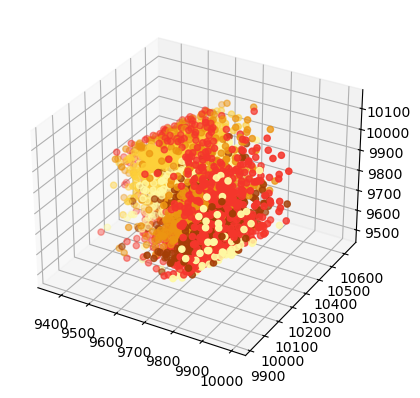

In [3]:
mllab.pca.plot_toy_slice(x, y, 0)

We want to remove the noise and recover the 2D information.

### Task 3.1

Write an implementation of the function below. Use a singular value decomposition (SVD), but avoid computing it completely since we only need the first $q$ eigenvectors. Remember to sort the eigenvalues accordingly. You can use a NumPy/SciPy function for this. Note: It might not return ordered eigenvalues.

In [4]:
from scipy.sparse.linalg import svds

def pca(x, q):
    """
    Compute principal components and the coordinates.

    Parameters
    ----------
    x : (n, d) NumPy array
        Input data matrix where n is the number of samples and d is the number of features.
    q : int
        The number of principal components to compute.
        Has to be less than d.

    Returns
    -------
    Vq : (d, q) NumPy array
        Orthonormal vectors (column-wise).
    xq : (n, q) NumPy array
        Coordinates for x (row-wise).
    """
    x_c = x - np.mean(x, axis = 0) # zentrieren, sonst funktioniert es nicht...
    
    # SVD,nur die ersten q singular values and vectors
    _, _, VT = svds(x_c, k = q)
    Vq = VT.T[:, :q]
    
    xq = np.dot(x_c, Vq) # coordinates
    
    return Vq, xq

Now we can compute the 2D dimensional representation of `x` using PCA.

In [5]:
_, xq = pca(x, q = 2)

### Task 3.2 a

And then plot the coordinates `xq`, which are two dimensional. We provide a helper function for this task. Let us check how to use it:

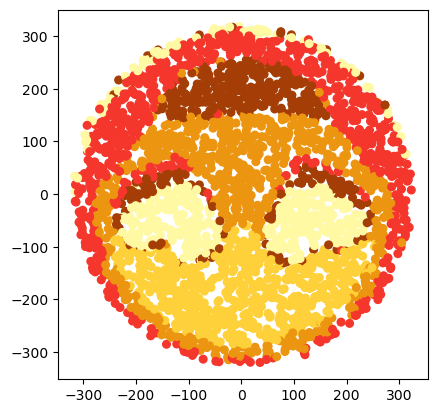

array([[ -29.72974835,  279.96066025],
       [ -38.30083255,  114.04890304],
       [  73.55131296, -229.82223422],
       ...,
       [ -29.35961355, -223.3692692 ],
       [-230.8908039 ,   43.05643437],
       [  50.48254457,  -26.59078233]])

In [6]:
mllab.pca.plot_toy_2d(xq, y)

Hopefully you appreciate the result.

### Task 3.2 b

Let us see how PCA handles a non-linear transformation. To test this we map our data into 3D by keeping the y-axis as the new z-axis and bending x-coordinate onto an ellipse.

In [6]:
xyz = mllab.pca.map_on_ellipse(xq, a = 32, b = 1, gap_angle = 90)

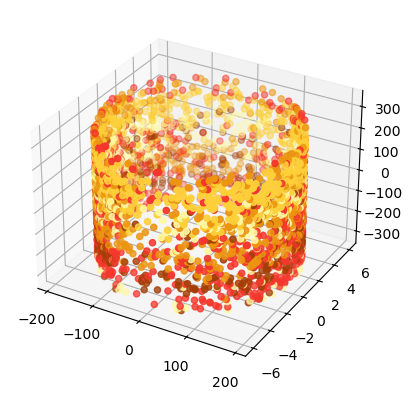

In [7]:
mllab.pca.plot_toy_3d(xyz, y)

**(Remeber to stop the interactive plot by pressing the shutdown icon!)**

Now apply PCA to our transformed data and plot the result as before.

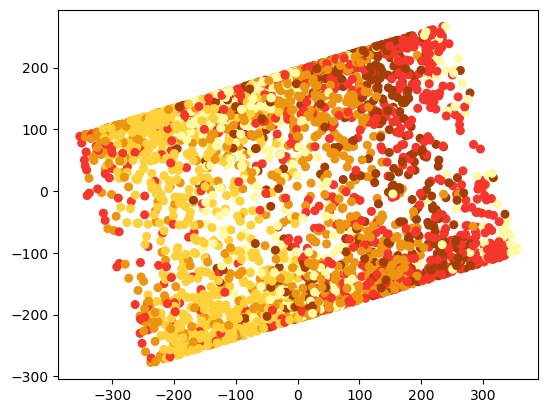

array([[ 313.82870749, -103.68336622],
       [  67.64474525,  190.61797432],
       [-186.91889298, -212.47667904],
       ...,
       [-239.9797959 ,  117.93692169],
       [ 177.82548223, -146.70316003],
       [  -8.12702631, -124.11063553]])

In [8]:
%matplotlib inline
_, xq2 = pca(xyz, q = 2) # pca
mllab.pca.plot_toy_2d(xq2, y) # plot

Could be worse, but undeniably discomforting. Try different axes lengths and gap sizes of the ellipse, especially try increasing b. What do you observe?


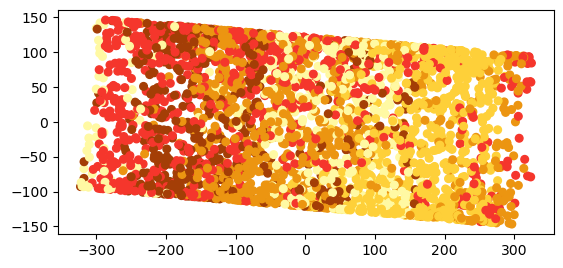

array([[-261.89827054,  116.71413876],
       [-118.63234538,    6.9124639 ],
       [ 231.92103809, -117.75914511],
       ...,
       [ 201.42937591,   70.75435512],
       [-130.35437506,  -39.32713107],
       [  52.7477066 ,   92.53801563]])

In [9]:
xyz = mllab.pca.map_on_ellipse(xq, a = 32, b = 25, gap_angle = 90)

%matplotlib inline
_, xq2 = pca(xyz, q = 2) # pca
mllab.pca.plot_toy_2d(xq2, y) # plot

### Task 3.3 a

We want to see if PCA can improve the accuracy of separating hyperlanes. First compute the singular values of the Iris dataset, then check how many percent of the variance the first two principal components capture.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']

x_s = (iris_x - np.mean(iris_x, axis = 0))#/np.std(iris_x, axis = 0) # ggf. standardize

_, s, VT = np.linalg.svd(x_s, full_matrices = False) # compute all singular values
s_sq = s**2 # square singular values

# variance captured by principal components
tot_var = np.sum(s_sq)
variance_percentage_1 = (s_sq[0]/tot_var)*100
variance_percentage_2 = (np.sum(s_sq[:2])/tot_var)*100

print(f"all singular values: {s}")
print(f"(squared): {s_sq}")
print(f"Variance percentage captured by the first principal component: {variance_percentage_1:.2f}%")
print(f"Variance percentage captured by the first two principal components: {variance_percentage_2:.2f}%")

all singular values: [25.09996044  6.01314738  3.41368064  1.88452351]
(squared): [630.0080142   36.15794144  11.65321551   3.55142885]
Variance percentage captured by the first principal component: 92.46%
Variance percentage captured by the first two principal components: 97.77%


### Task 3.3 b

Now apply PCA and compute the first two principal components. Plot the projected 2D data in a scatter plot such that the three labels are recognizable. What do you observe?

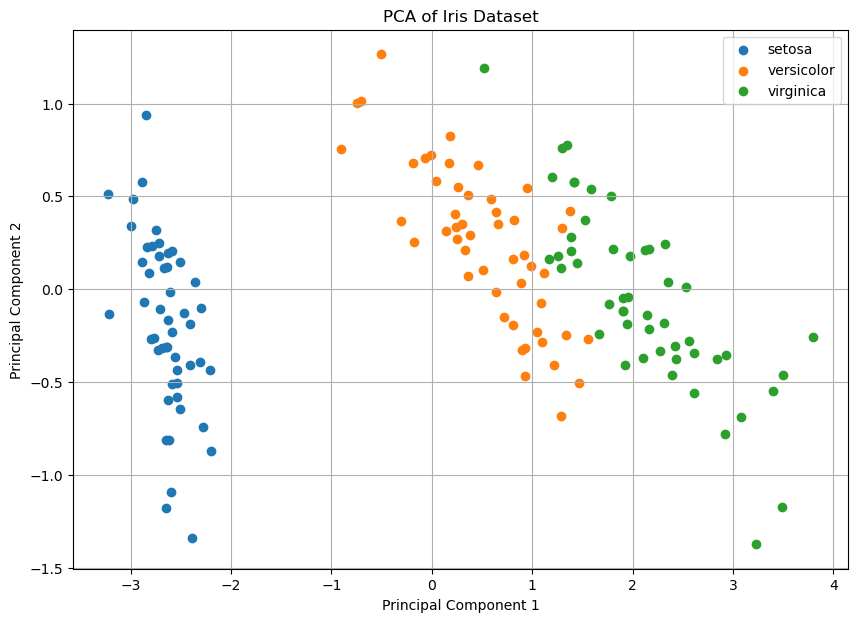

In [12]:
import matplotlib.pyplot as plt

# pca transformation using first TWO principal components
V2 = VT.T[:, :2]
x_trans = np.dot(x_s, V2)

# plt
plt.figure(figsize = (10, 7))
for label in np.unique(iris_y):
    plt.scatter(x_trans[iris_y == label, 0], x_trans[iris_y == label, 1], label=iris.target_names[label])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

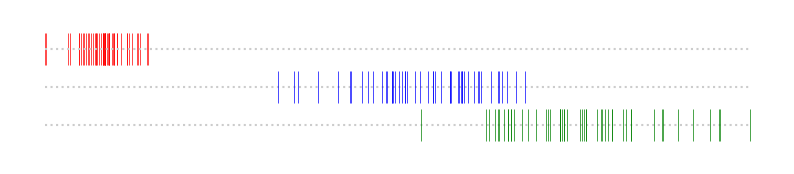

In [13]:
def plot_1d_iris(a, b, c):
    """Show a 1D plot of three 1D datasets a, b and c.
    
    Top to bottom plotted in order is a, b, c."""
    af = a.flatten()
    bf = b.flatten()
    cf = c.flatten()
    left = min(x.min() for x in (af, bf, cf))
    right = max(x.max() for x in (af, bf, cf))
    for i, (x, cf) in enumerate(((af, 'red'), (bf, 'blue'), (cf, 'green'))):
        plt.hlines(i * .3, left, right, linestyles='dotted', colors=[(.8,.8,.8,1)])
        plt.eventplot(x, colors=cf, linewidths=.5, linelengths=.25, lineoffsets=(2 - i) * .3 )
    plt.axis('off')

# pca transformation using FIRST principal component
V1 = VT.T[:, 0]
x_trans_1d = np.dot(x_s, V1)

setosa = x_trans_1d[iris_y == 0]
versicolor = x_trans_1d[iris_y == 1]
virginica = x_trans_1d[iris_y == 2]

plt.figure(figsize = (10, 2))
plot_1d_iris(setosa, versicolor, virginica)

### Task 3.3 c

Finally, recompute the accurancy as in sheet 1 and compare the results. Remember to separate the data into train and test set.

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

def labels(x1, x2):
    return np.concatenate((np.zeros(x1.shape[0], dtype='int'), np.ones(x2.shape[0], dtype='int')))

In [15]:
from sklearn.model_selection import train_test_split

# split data, balanced classes
x_train_se, x_test_se, y_train_se, y_test_se = train_test_split(
    iris_x[iris_y == 0], np.zeros((sum(iris_y == 0),)), test_size = 0.2, random_state = 42)
x_train_ver, x_test_ver, y_train_ver, y_test_ver = train_test_split(
    iris_x[iris_y == 1], np.ones((sum(iris_y == 1),)), test_size = 0.2, random_state = 42)
x_train_vir, x_test_vir, y_train_vir, y_test_vir = train_test_split(
    iris_x[iris_y == 2], np.ones((sum(iris_y == 2),)) * 2, test_size = 0.2, random_state = 42)
x_train = np.concatenate((x_train_se, x_train_ver, x_train_vir))
y_train = np.concatenate((y_train_se, y_train_ver, y_train_vir))
x_test = np.concatenate((x_test_se, x_test_ver, x_test_vir))
y_test = np.concatenate((y_test_se, y_test_ver, y_test_vir))

# ggf. standardize
x_train_s = (x_train - np.mean(x_train, axis = 0))/np.std(x_train, axis = 0)
x_test_s = (x_test - np.mean(x_test, axis = 0))/np.std(x_test, axis = 0)

# ändere PCA function
def pca(x, q):
    x_c = x - np.mean(x, axis = 0)
    _, _, VT = np.linalg.svd(x_c, full_matrices = False) # full svd, da "nur die ersten q values" bei q = 4 nicht funtioniert
    Vq = VT.T[:, :q]
    xq = np.dot(x_c, Vq)
    return Vq, xq

for i in [4, 2, 1]:
    # pca
    Vq, x_train_pca = pca(x_train_s, i)
    x_test_pca = np.dot(x_test_s - np.mean(x_test_s, axis = 0), Vq)

    # LinearSVC
    svm = LinearSVC()
    svm.fit(x_train_pca, y_train)
    y_pred = svm.predict(x_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{i}D PCA:")
    print("accuracy:", accuracy)
    print("confusion matrix:")
    print(cm)

4D PCA:
accuracy: 0.9666666666666667
confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
2D PCA:
accuracy: 0.9
confusion matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
1D PCA:
accuracy: 0.9333333333333333
confusion matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Pedestrian Classification

### Task 3.4 a

__Read the pedestrian dataset into a NumPy array and normalize to [0,1]__

In [16]:
train_w = mllab.pca.load_pedestrian_images('train', True)/255
train_o = mllab.pca.load_pedestrian_images('train', False)/255
test_w = mllab.pca.load_pedestrian_images('test', True)/255
test_o = mllab.pca.load_pedestrian_images('test', False)/255

### Task 3.4 b

__Write a function to plot an image__

In [17]:
def plot_im(im, ax = None, title = None, max_contrast = False, vmin = -0.5, vmax = 0.5):
    """
    Plot a normalized image.
    
    Parameters
    ----------
    
    im: (1250,) array-like --> WARUM 1250???
    """
    im = np.reshape(im, (100, 50, 3))
    if max_contrast: # weiß nicht so genau, was mit max_contrast gemeint ist
        im = (im - im.min())/(im.max() - im.min())
    ax.imshow(im, vmin = vmin, vmax = vmax)
    ax.set_title(title)
    ax.axis('off')

__Plot 10 randomly chosen images showing a pedestrian, and 10 randomly chosen images not showing a pedestrain.__

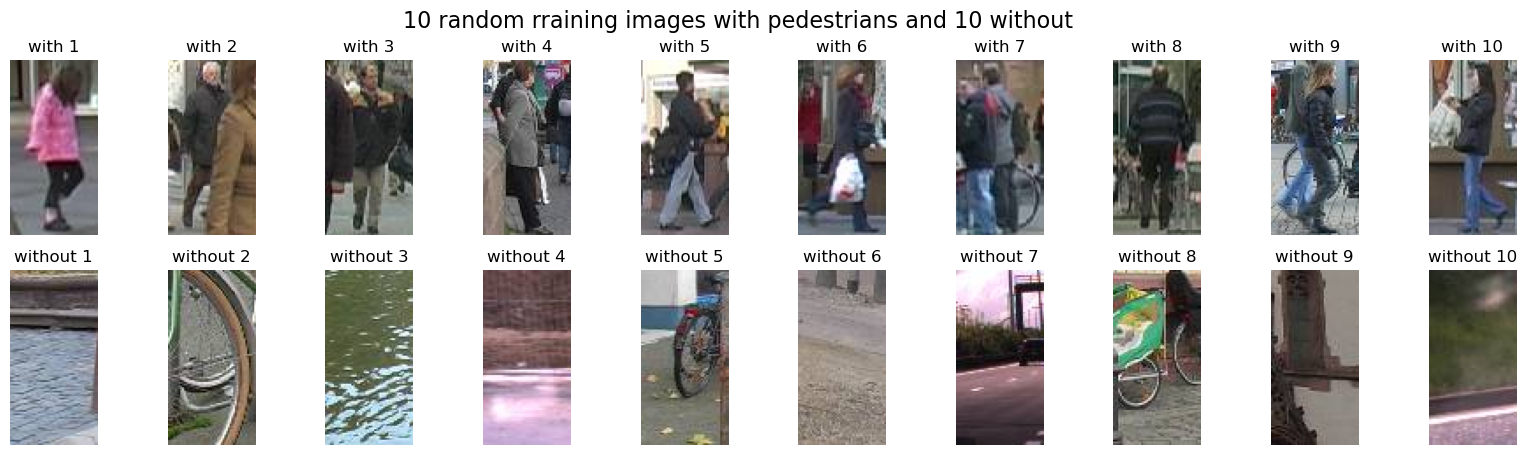

In [18]:
fi, a = plt.subplots(2, 10, figsize = (20, 5))
fi.suptitle('10 random rraining images with pedestrians and 10 without', fontsize = 16)
for i, ax in enumerate(a[0]):
    plot_im(train_w[np.random.choice(train_w.shape[0], 10, replace = False)[i]].flatten(), ax = ax, title=f'with {i+1}')
for i, ax in enumerate(a[1]):
    plot_im(train_o[np.random.choice(train_o.shape[0], 10, replace = False)[i]].flatten(), ax = ax, title=f'without {i+1}')

### Task 3.5 a

__Compute the PCA of the full training set for $q=200$__

In [19]:
from sklearn.decomposition import PCA

training_data = np.concatenate((train_w, train_o))

# want to have format (n, 100*50*3)
training_data = training_data.reshape(training_data.shape[0], -1)
print(training_data.shape)

# ggf. standadize...

# apply pca with q = 200
pca = PCA(n_components = 200)
pca.fit(training_data)
print(pca.transform(training_data).shape)

# check variance perc
tot_explained_var = np.sum(pca.explained_variance_ratio_)
print(f"tot. explained var by first 200 comp: {tot_explained_var:.2f}")

(2000, 15000)
(2000, 200)
tot. explained var by first 200 comp: 0.96


### Task 3.5 b

__Plot the eigenpedestrian 1-20, 51-60, and 111-120__

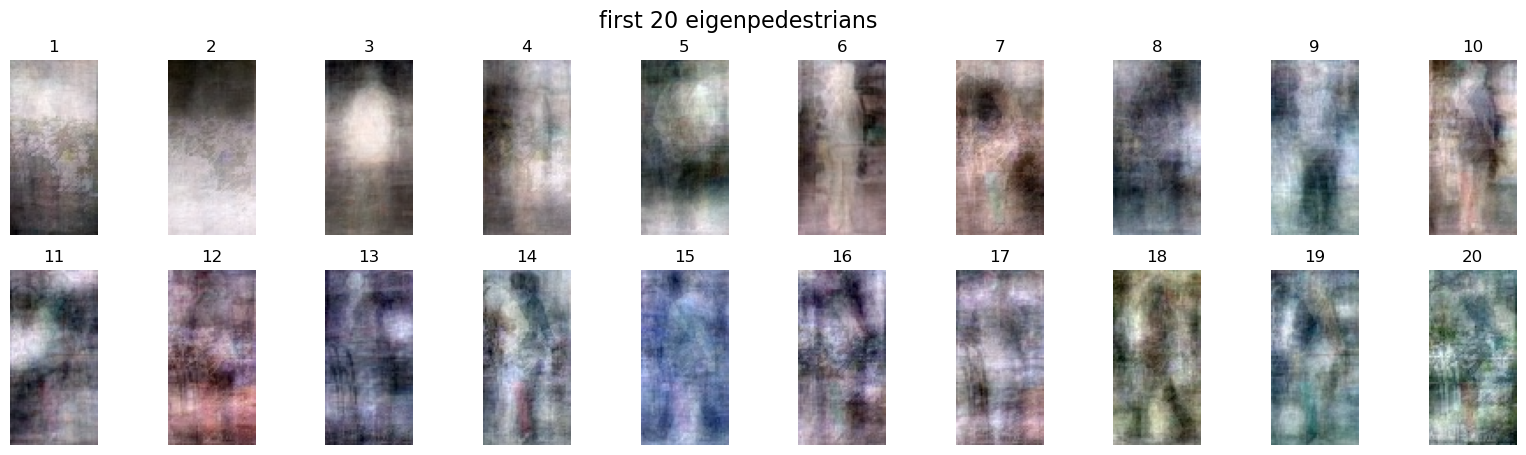

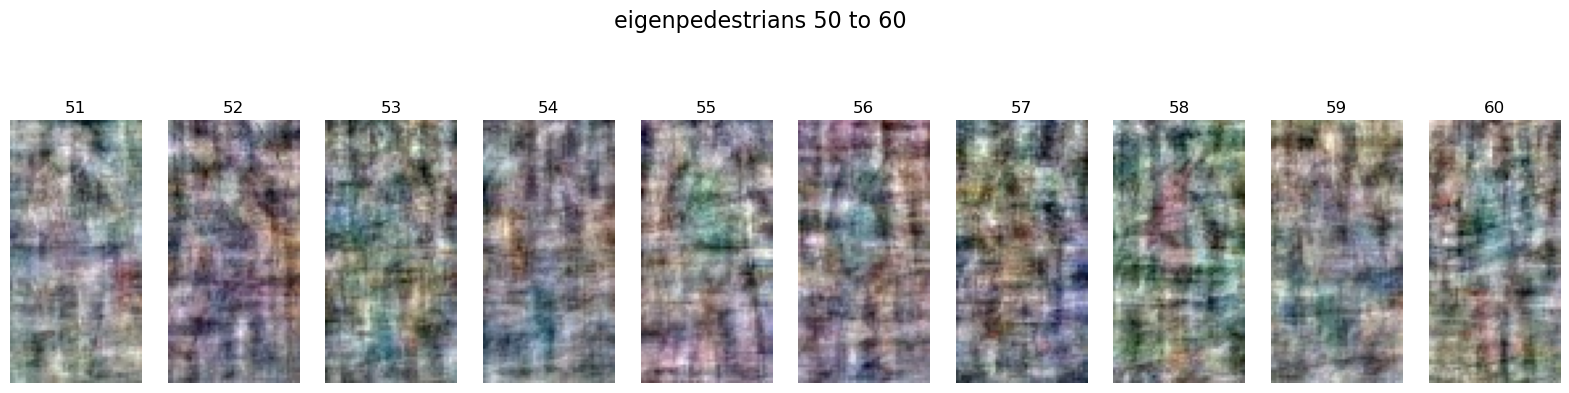

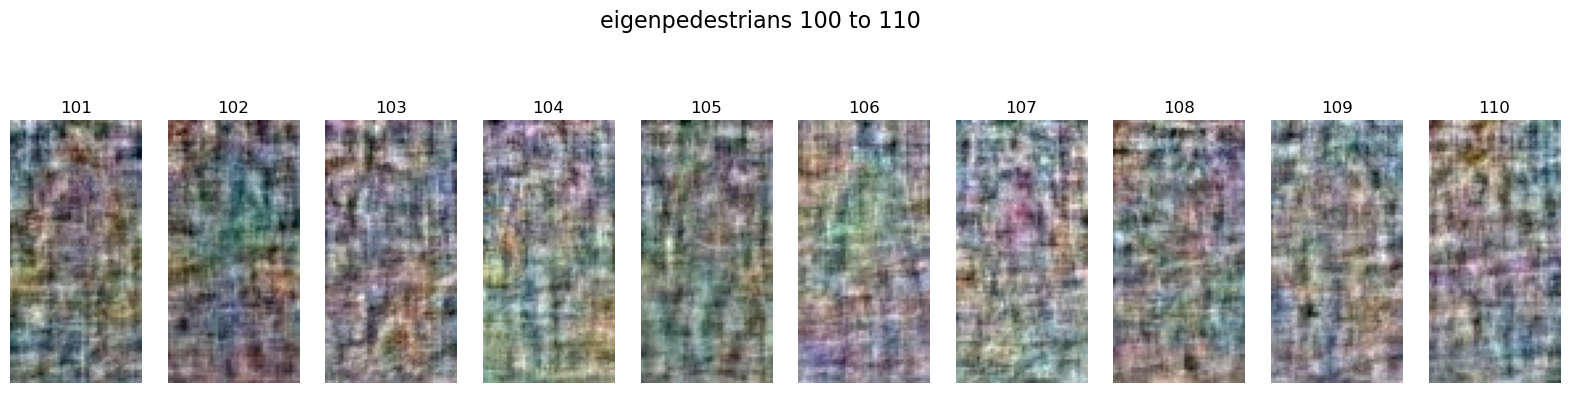

In [20]:
def plt_eigenpedestrians(indices, title, eigenpedestrians = pca.components_):
    fi, a = plt.subplots(len(indices)//10, 10, figsize = (20, 5))
    fi.suptitle(title, fontsize = 16)
    for i, ax in enumerate(a.flat):
        index = indices[i]
        plot_im(eigenpedestrians[index], ax = ax, title=f'{index + 1}',max_contrast=True)
        
plt_eigenpedestrians(np.arange(20), "first 20 eigenpedestrians")
plt_eigenpedestrians(np.arange(50, 61), "eigenpedestrians 50 to 60")
plt_eigenpedestrians(np.arange(100, 111), "eigenpedestrians 100 to 110")

Zunächst kann man beobachten, dass die Werte der Eigenpedestrians so klein sind, dass die Bilder alle als schwarz ausgegeben, wenn man nicht den Kontrast erhöht. Das ergibt auch Sinn, da die Eigenvektoren normiert sind und daher $||x||= \sum_{i=0}^{15000}x_i² =1$. Also müssen die Einträge entsprechend klein sein. Wir setzten max_contrast auf True um die Konturen sichtbar zu machen.

Was dann auffällt, ist dass die Ertsen Bilder nur aus Schattenbereichen besteht. Je höher der index der Eigenpedestrians wird, desto mehr Farbe und Schatten/Licht Bereiche kommen hinzu. In den meisten heir ausgedruckten Eigenpedestrians kann man Konturen von Personen erkennen. 

Die Eigenpedestrians erkennen vermutlich Muster in den vorherigen Bildern und visualisieren diese.

### Task 3.6

__Compute the scores for a linear SVM using increasing numbers of principal components__

Use 10 to 200 components in steps of 5. Train the linear SVM with $C=0.01$ and increse the maximum number of iterations for the solver. You can reuse the computed PCA from above.

In [21]:
# combine create labels
training_labels = labels(train_w, train_o)
test_ims = np.concatenate((test_w, test_o))
test_ims = test_ims.reshape(test_ims.shape[0], -1) # want to have format (n, 100*50*2)
test_labels = labels(test_w, test_o)

# ggf standardize

Q = np.arange(10, 201, 5)
train_accu = []
test_accu = []

for q in Q:
    pca = PCA(n_components = q)
    pca.fit(training_data)
    train_pca = pca.transform(training_data)
    test_pca = pca.transform(test_ims)
    
    # Train a LinearSVC
    svm = LinearSVC(C = 0.01, max_iter = 10000)
    svm.fit(train_pca, training_labels)
    
    # Compute accuracy on training and test sets
    train_accuracy = svm.score(train_pca, training_labels)
    test_accuracy = svm.score(test_pca, test_labels)
    
    train_accu.append(train_accuracy)
    test_accu.append(test_accuracy)

/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib64/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The defau

Plot the training and test scores over $q$.

The best number of principal components is: 30.
accuracy: 0.82


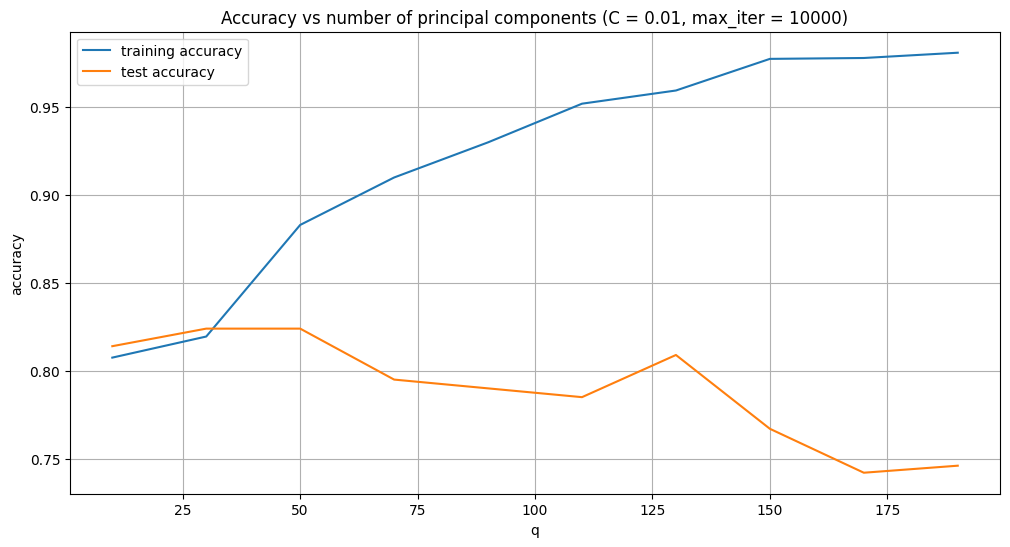

In [23]:
# plt
plt.figure(figsize = (12, 6))
plt.plot(Q, train_accu, label = 'training accuracy')
plt.plot(Q, test_accu, label = 'test accuracy')
plt.xlabel('q')
plt.ylabel('accuracy')
plt.title('Accuracy vs number of principal components (C = 0.01, max_iter = 10000)')
plt.legend()
plt.grid(True)

# best choice of q
best_q_i = np.argmax(test_accu)
best_q = Q[best_q_i]
print(f"The best number of principal components is: {best_q}.")
print(f'accuracy: {test_accu[best_q_i]:.2f}')